In [1]:
#Import libraries 
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt 
import datetime as dt 
import time
from statsmodels.tsa.statespace.sarimax import SARIMAX
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
Data = pd.read_csv('ambient_temperature_system_failure.csv', parse_dates=True, index_col='timestamp')

In [3]:
one_var = Data['value']

In [4]:
from statsmodels.graphics.tsaplots import plot_acf

In [5]:
plot_acf?

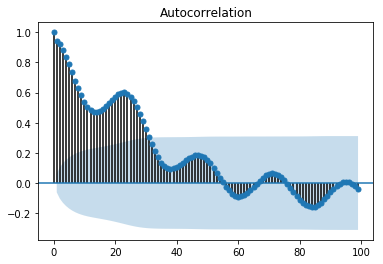

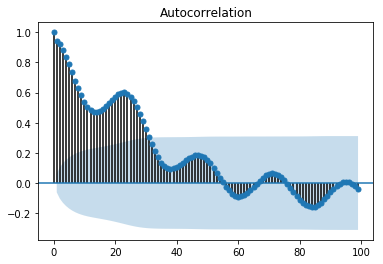

In [5]:
plot_acf(one_var[:1000], lags = np.arange(100))

To fit the Arima model $2^6 =64$ possible parameters combinations are tested, also, as the parameters are tested to a quite long time series the execution time is significant

In [6]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]

from statsmodels.tsa.statespace.sarimax import SARIMAX

#warnings.filterwarnings("ignore") # specify to ignore warning messages
# Chooses the adequated parameters attending to the AIC
AIC = -1
for param in pdq:
    for param_seasonal in seasonal_pdq:
        start = time.time()
        try:
            mod = SARIMAX(one_var,
                                order=param,
                                seasonal_order=param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

            results = mod.fit()
            if (AIC == -1 or AIC > results.aic):
                print('ARIMA{}x{}24 - AIC:{}'.format(param, param_seasonal, results.aic))
                AIC = results.aic
                c_param = param
                c_param_seasonal = param_seasonal
        except:
            continue
        end = time.time()
        print(end - start)

# Prints the ARIMA model Results      
c_mod = SARIMAX(one_var,
                order=c_param,
                seasonal_order=c_param_seasonal,
                enforce_stationarity=False,
                enforce_invertibility=False)
results = c_mod.fit()

print(results.summary().tables[1])

ARIMA(0, 0, 0)x(0, 0, 1, 24)24 - AIC:72634.37971905802
15.58497667312622
ARIMA(0, 0, 0)x(0, 1, 1, 24)24 - AIC:33114.97971722028
10.858235120773315
4.530407905578613
6.534699201583862
8.19697642326355
ARIMA(0, 0, 0)x(1, 1, 1, 24)24 - AIC:31972.03314434419
24.7066912651062
4.137240171432495
36.06264615058899
ARIMA(0, 0, 1)x(0, 1, 0, 24)24 - AIC:28671.070408714146
4.913201808929443
ARIMA(0, 0, 1)x(0, 1, 1, 24)24 - AIC:27917.935293690185
17.505341053009033
9.211410760879517


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


23.671637535095215
13.83505630493164
ARIMA(0, 0, 1)x(1, 1, 1, 24)24 - AIC:26993.476645512877
26.31765842437744
ARIMA(0, 1, 0)x(0, 0, 1, 24)24 - AIC:19381.838910554827
5.236330270767212
ARIMA(0, 1, 0)x(0, 1, 1, 24)24 - AIC:19240.442623683626
24.31036877632141


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


5.582195520401001
9.706674814224243
8.540082693099976
ARIMA(0, 1, 0)x(1, 1, 1, 24)24 - AIC:19232.357718160587
37.02906036376953
ARIMA(0, 1, 1)x(0, 0, 0, 24)24 - AIC:19075.552570220974
2.734483003616333
ARIMA(0, 1, 1)x(0, 0, 1, 24)24 - AIC:18786.19280123669
5.3725621700286865
4.429608583450317
ARIMA(0, 1, 1)x(0, 1, 1, 24)24 - AIC:18406.823254978513
20.782819986343384
4.790668964385986
ARIMA(0, 1, 1)x(1, 0, 1, 24)24 - AIC:18401.340671511054
10.983303308486938
11.949768781661987
ARIMA(0, 1, 1)x(1, 1, 1, 24)24 - AIC:18364.58105929962
27.984662532806396
2.586742639541626
6.152892827987671
4.136050462722778
28.544559001922607
7.005110740661621
18.246490240097046
12.605772495269775
41.79571723937988
3.060133695602417
12.1139075756073
5.105166435241699
ARIMA(1, 0, 1)x(0, 1, 1, 24)24 - AIC:18320.85840708966
25.270392656326294
8.047546625137329
16.86579918861389
14.214563608169556
ARIMA(1, 0, 1)x(1, 1, 1, 24)24 - AIC:18277.06075041862
37.03314757347107
3.17162823677063
5.9218809604644775
3.53109

In [14]:
type(c_param)
p_param

tuple

In [ ]:
c_mod = SARIMAX(one_var,
                order=c_param,
                seasonal_order=c_param_seasonal,
                enforce_stationarity=False,
                enforce_invertibility=False)
results = c_mod.fit()

In [7]:
results = c_mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9740      0.003    356.009      0.000       0.969       0.979
ma.L1         -0.3242      0.008    -43.016      0.000      -0.339      -0.309
ar.S.L24       0.0973      0.012      8.149      0.000       0.074       0.121
ma.S.L24      -0.9327      0.005   -192.554      0.000      -0.942      -0.923
sigma2         0.7309      0.008     97.288      0.000       0.716       0.746


The error distribution seems to correspond to a normal error distribution 

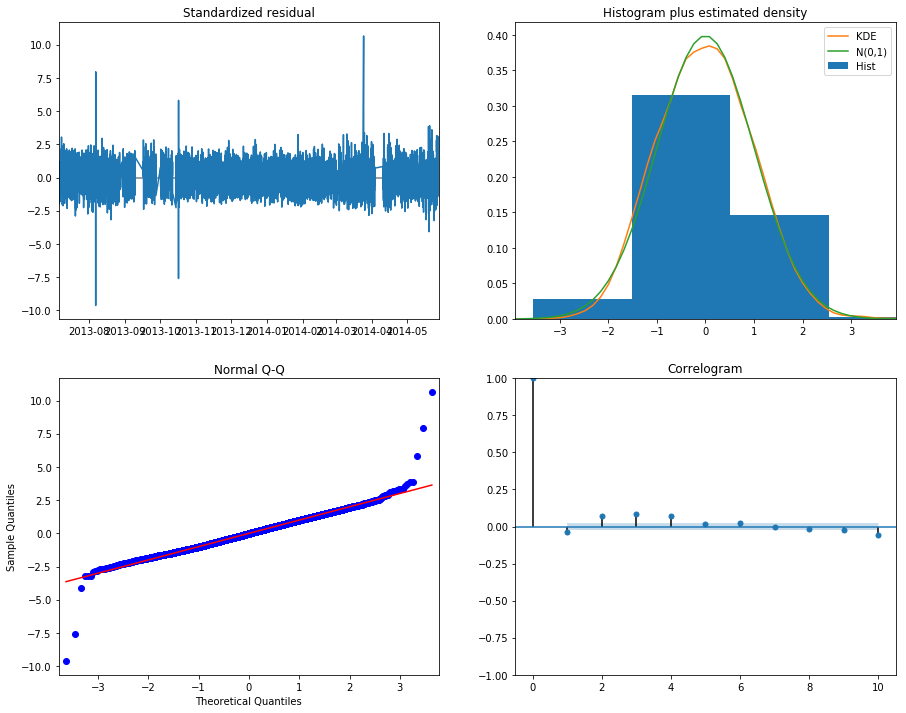

In [8]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

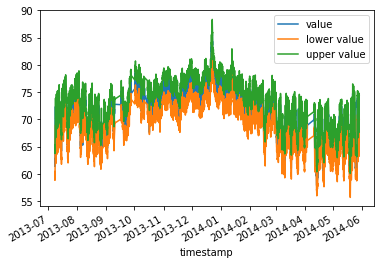

In [9]:
var_chosen = 'value'
pred = results.get_prediction(start=pd.to_datetime('2013-07-04'), dynamic=False)
pred_ci = pred.conf_int(alpha=0.01)
x = pd.DataFrame(one_var)
DF = pd.concat([x, pred_ci], axis=1)
DF['Flag_Anomaly'] = (DF[var_chosen] > DF['upper ' + var_chosen]) | (DF[var_chosen] < DF['lower ' + var_chosen])
DF[100:].plot()
DF['Anomaly'] = DF[var_chosen] * DF['Flag_Anomaly']

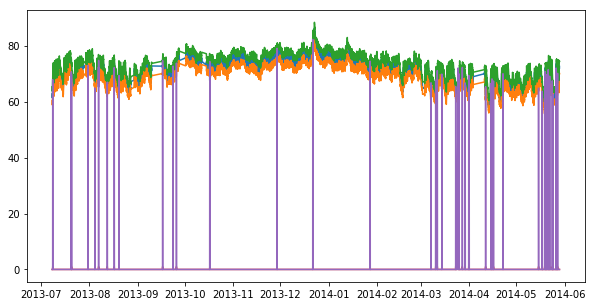

In [12]:
plt.figure(figsize=(10,5))
plt.plot(DF[100:])

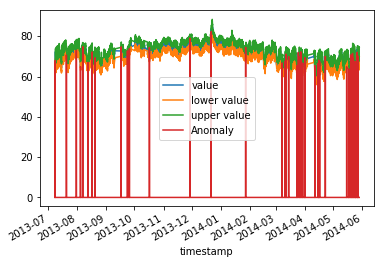

In [10]:
DF[100:].plot()

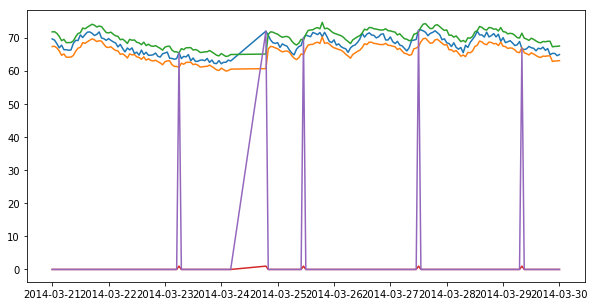

In [11]:

a = dt.datetime(2014, 3, 21) # Fixes the start date 
b = dt.datetime(2014, 3, 30) # Fixes the start date 
plt.figure(figsize=(10,5))
plt.plot(DF[a:b])

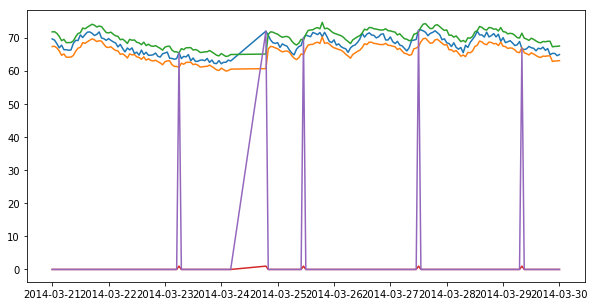

In [44]:

a = dt.datetime(2014, 3, 21) # Fixes the start date 
b = dt.datetime(2014, 3, 30) # Fixes the start date 
plt.figure(figsize=(10,5))
plt.plot(DF[a:b])

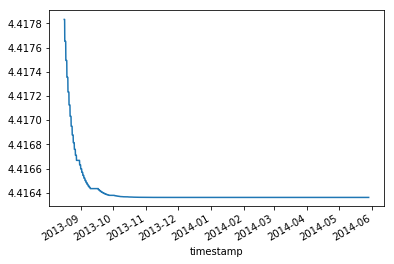

In [18]:
(DF["upper value"] - DF["lower value"])[1000:].plot()

# Windowed SARIMA and exponential weight 

The fitted model gives us a general parameter estimation for the whole time series: <br>
The idea is to use the information obtained in the previous point in order to obtain a reasonable set of parameters along the whole time series, i.e. parameters p, d, q, P, D, Q for the $SARIMA(p,d,q,P,D,Q,24)$ model. <br>
It should be noted that there is a need to determine in an automatic way the time series periodicity

In [ ]:
# Window fitting size
Wfit = 24*6
# Window prediction size 
wpred = 6

In [49]:
x = 3000

In [84]:
#for x in range(len(DF)):
a =time.time()
fit_data = one_var[max(0,x-Wfit):x]

l_model = SARIMAX(fit_data,
                    order=c_param,
                    seasonal_order=c_param_seasonal,
                    enforce_stationarity=False,
                    enforce_invertibility=False)
fitted = l_model.fit()
pred = fitted.get_forecast(steps=100)
b =time.time()
print(b-a)

1.2097034454345703


Based of the ammount of time required to fit a single SARIMA model this model seems to be unviable to the ammount of data available

In [82]:
pred.conf_int(alpha=0.05).iloc[:,]

,lower value,upper value
2013-11-22 19:00:00,74.940667,78.008413
2013-11-22 20:00:00,74.538701,77.755756
2013-11-22 21:00:00,74.849650,78.201440
2013-11-22 22:00:00,75.111125,78.585206
2013-11-22 23:00:00,74.868430,78.454032
2013-11-23 00:00:00,74.563837,78.251532
2013-11-23 01:00:00,74.133780,77.915242
2013-11-23 02:00:00,73.835088,77.702904
2013-11-23 03:00:00,73.612580,77.560113
2013-11-23 04:00:00,73.263278,77.284547


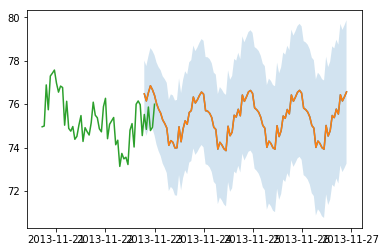

In [85]:
plt.fill_between(pred.conf_int(alpha=0.05).index,pred.conf_int(alpha=0.05).iloc[:,0],pred.conf_int(alpha=0.05).iloc[:,1], alpha =0.20)
plt.plot(pred.predicted_mean)
plt.plot(pred.predicted_mean)
plt.plot(one_var[max(0,x-50):x+6])
plt.show()

# Windowed ARIMA + Exponential weight

In this point we are going to test the method proposed on the paper <br>
First step would consist on check the stationatity of the differential model to determine the diferentitation order of the model

In [86]:
from statsmodels.tsa.arima_model import ARIMA
# Window fitting size
Wfit = 24*6
# Window prediction size 
wpred = 6

In [ ]:
for x in range(len(one_var)):
    fit_data[max(0,x-Wfit):x]
    # first step would be checking stationarity
    l_model = ARIMA(fit_data,
                    order=c_param,
                    seasonal_order=c_param_seasonal,
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    fitted = l_model.fit()
    pred = fitted.get_forecast(steps=100)
    b =time.time()
    print(b-a)

# Windowed statistical models

In [17]:
Data = pd.read_csv('ambient_temperature_system_failure.csv', parse_dates=True, index_col='timestamp')
one_var = Data['value']
# Select window sizes
W = 500
tiqr = 2.5
tstd = 3

In [18]:
Data['Anomaly_IQR']=False
Data['Anomaly_Norm']=False
for x in range(len(one_var)):
    if x > 30:
        data = one_var[max(0,x-W):x-1]
        mean = np.mean(data)
        std = np.std(data)
        q3 = np.percentile(data, 75)
        q1 = np.percentile(data, 25)
        iqr = q3 - q1
        Data.iat[x,-1] =  abs(one_var[x]-mean) > std*tstd
        Data.iat[x,-2] =  (one_var[x] > q3 + iqr*tiqr) & (one_var[x] < q1 - iqr*tiqr)
        #print("Varianza: ", abs(one_var[x]-median), ", TIQR: ", iqr*tiqr)
    
    
Data['Anomaly_val_IQR'] = Data['value'] * Data['Anomaly_IQR']
Data['Anomaly_val_Norm'] = Data['value'] * Data['Anomaly_Norm']

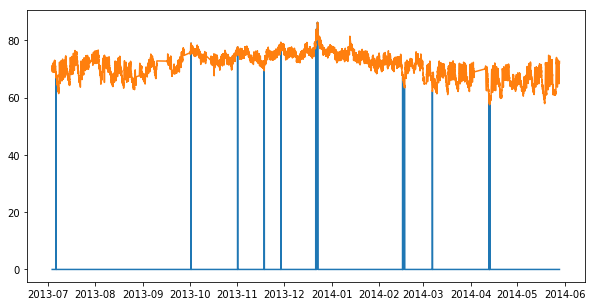

In [21]:
plt.figure(figsize=(10,5))
plt.plot(Data[['Anomaly_val_Norm', 'value']])